Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de molas:  substitua duas molas que ligam uma massa por (k2=5k)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a k2 = 5k  (apenas em uma das simulações)
 
Tarefas  
1. Cálculo das Frequências de Vibração  
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:  
• Cadeia homogênea (todas as massas iguais)  
• Cadeia com defeito de massa no centro  
2. Densidade de Estados  
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.  
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.  
3. Deslocamentos Relativos (Modos Normais)  
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:  
• Às cinco menores frequências (modos de baixa energia)  
• Às cinco maiores frequências (modos de alta energia)  
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.  
4. Análise e Comparação  
• Analise como o tamanho da cadeia e a presença do defeito afetam:  
• A distribuição das frequências (densidade de estados)  
• Os padrões de deslocamento dos modos normais  
• Discuta a localização dos modos associados ao defeito de massa.  
Orientações para Implementação em Python  
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.  
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.  
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.  
• Para grandes valores de , otimize o código para eficiência computacional.  
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.  
   
Instruções para Entrega  
 • A resposta deve ser enviada via Moodle devidamente comentada.  
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.  
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.  
   
Sugestão de Estrutura para a resposta  
1. Introdução  
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.  
2. Metodologia  
• Descrição do método numérico utilizado para calcular frequências e modos.  
3. Resultados  
• Histogramas das densidades de estados para cada caso.  
• Gráficos dos deslocamentos relativos para os modos selecionados.  
• Tabela comparativa dos principais resultados.  
4. Discussão  
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.    
• Observações sobre a localização dos modos e possíveis aplicações.  
5. Conclusão  
• Síntese dos principais achados.  
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.  

### Preâmbulo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.sparse import diags, csr_matrix
import pandas as pd

In [87]:
#Parâmetros
m, k1, k2 = 1.0, 1.0, 5.0
N1, N2, N3 = 100, 1000, 10000

### Cadeia de 100 átomos

In [131]:
# Inicializa a matriz D com zeros
D100 = np.zeros((N1, N1))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N1):
    if i == N1-1:  # Última massa
        D100[i, i] = 2*k1/m
        D100[i, i-1] = -k1/m
        D100[i, 0] = -k1/m
    else:  
        D100[i, i] = 2*k1/m
        D100[i, i-1] = -k1/m
        D100[i, i+1] = -k1/m
        
        

Cadeia linear

In [123]:
D100

array([[2., 1., 0., ..., 0., 0., 1.],
       [1., 2., 1., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 1., 0.],
       [0., 0., 0., ..., 1., 2., 1.],
       [1., 0., 0., ..., 0., 1., 2.]])

Cria a matriz com problema de massa

In [132]:
#cria a matriz com problema de massa multiplica o vetor (linha 49) por k2
D100_mod = D100.copy()
D100_mod[4, :] *= k2

In [133]:
D100_mod

array([[ 2., -1.,  0., ...,  0.,  0., -1.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [-1.,  0.,  0., ...,  0., -1.,  2.]])

Autovalores, autovetores e $\omega_i$

In [134]:
ww100, v100 = eigh(D100)
#ww100 = np.linalg.eigvals(D100)
w100 = np.sqrt(ww100) 


ww100_mod, v100_mod = eigh(D100_mod)
#ww100_mod = np.linalg.eigvals(D100)
w100_mod = np.sqrt(np.abs(ww100_mod))

In [135]:
ww100[0]


1.2878586704828553e-15

In [136]:
v100[0]

array([-1.00000000e-01,  2.47366602e-03, -1.41399721e-01,  3.69166784e-03,
        1.41373164e-01,  1.35234459e-01,  4.13719854e-02, -1.40825248e-01,
       -1.29711035e-02, -3.62511117e-03, -1.41374887e-01, -5.21840118e-03,
        1.41325045e-01, -2.13449272e-03, -1.41405247e-01, -5.33558584e-03,
       -1.41320669e-01,  1.36092410e-02, -1.40765012e-01, -1.40544091e-01,
       -1.57276376e-02, -3.65743398e-03, -1.41374054e-01, -5.28220381e-02,
       -1.31186250e-01,  1.55644077e-02,  1.40562261e-01,  1.24783729e-01,
       -6.65508903e-02,  8.23124969e-03, -1.41181608e-01, -7.57089426e-02,
       -1.19449387e-01,  1.35835902e-01, -3.93523532e-02, -3.31511961e-02,
        1.37480901e-01, -6.93728484e-02,  1.23237202e-01, -2.87138841e-02,
       -1.38475676e-01, -1.19478876e-01, -7.56623960e-02,  1.50207875e-02,
        1.40621392e-01,  9.97289269e-03, -1.41069279e-01, -2.00159864e-02,
       -1.39997715e-01,  8.53984325e-02, -1.12725808e-01, -2.52839255e-02,
        1.39142816e-01,  

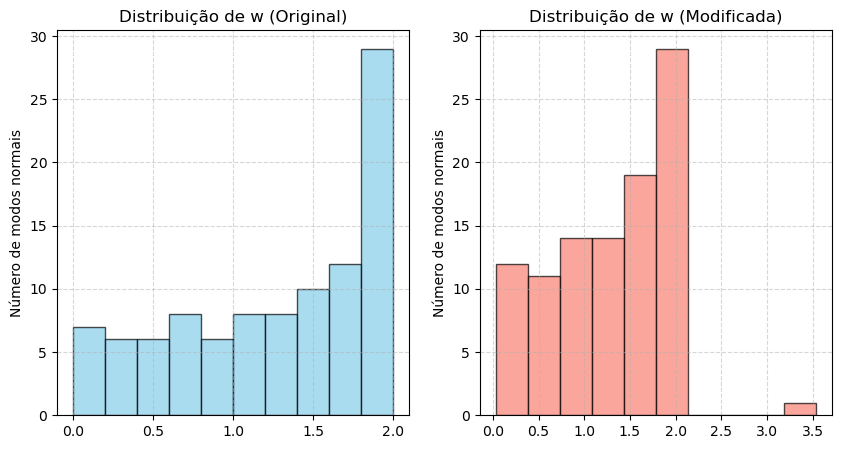

In [137]:
# Configuração do histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: Histograma de w100 ---
ax1.hist(w100, 
         bins=10,
         edgecolor='black',
         color='skyblue',
         alpha=0.7)
ax1.set_title('Distribuição de w (Original)')
ax1.set_xlabel('')
ax1.set_ylabel('Número de modos normais')
ax1.grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Histograma de w100_mod ---
ax2.hist(w100_mod, 
         bins=10,
         edgecolor='black',
         color='salmon',
         alpha=0.7)
ax2.set_title('Distribuição de w (Modificada)')
ax2.set_xlabel('')
ax2.set_ylabel('Número de modos normais')
ax2.grid(linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

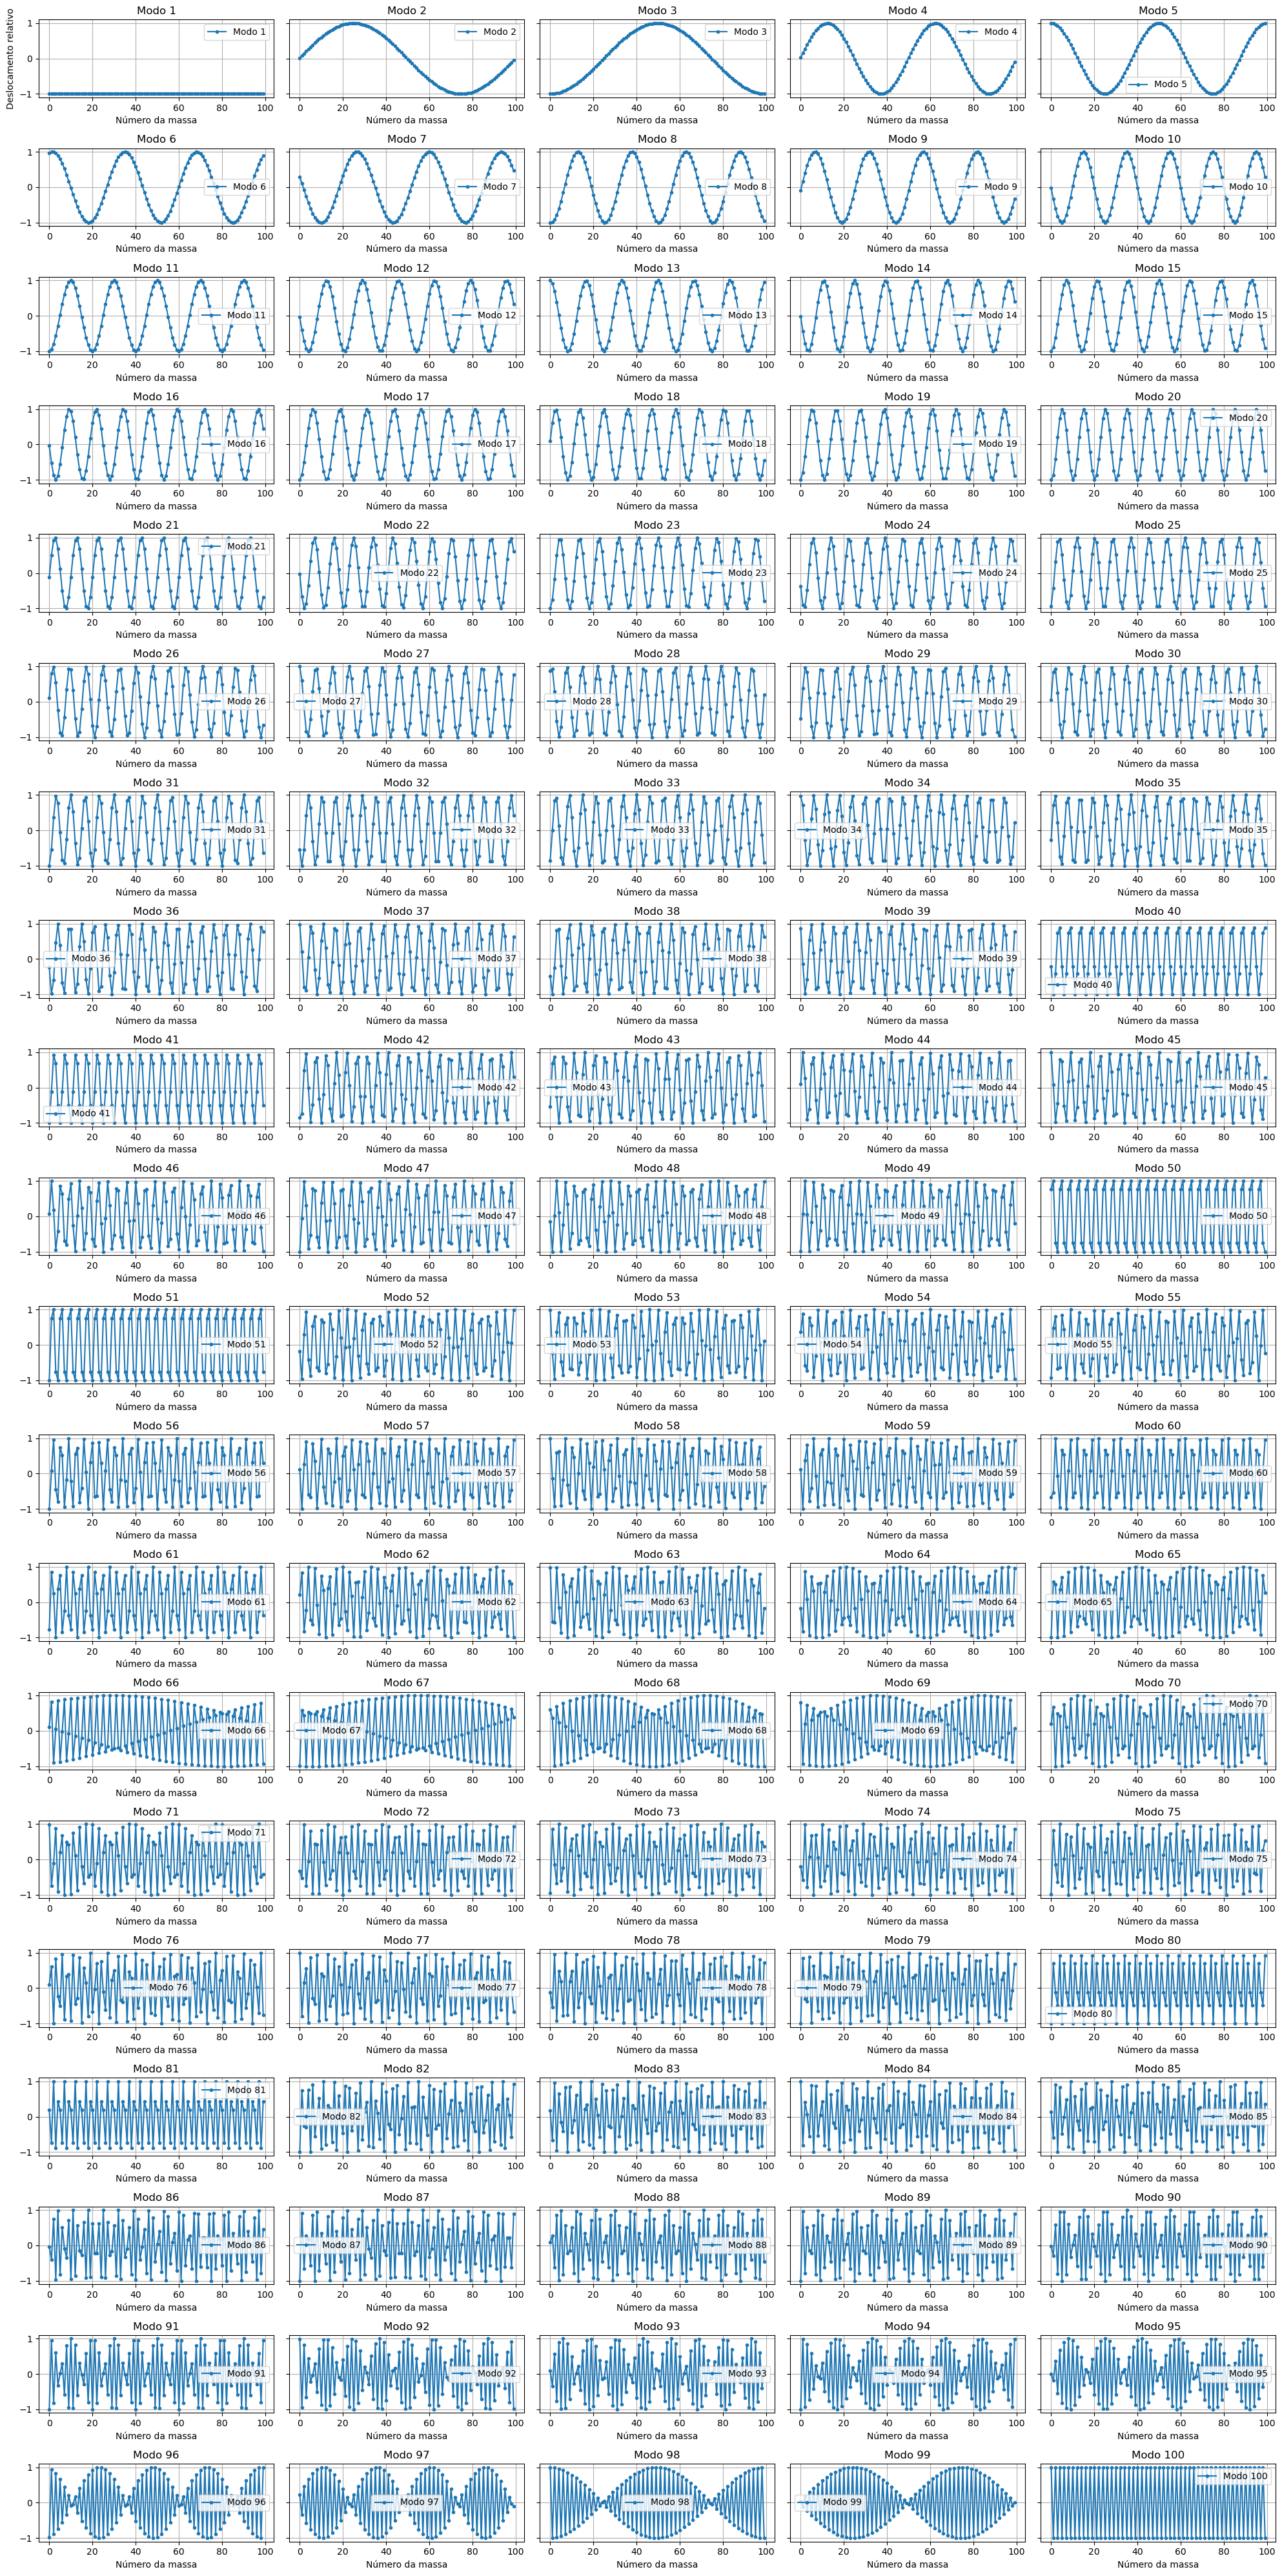

In [138]:
# Normalização dos autovetores
autovetores = v100
massas = N1

modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0) # serve para deixar tudo com a mesma amplitude na hora de plotar

n_cols = int(np.ceil((np.sqrt(massas))/2))  
n_rows = int(np.ceil((massas) / n_cols))

# Criar figura com subplots individuais
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), sharey=True)  # 1 linha, N colunas
axs = np.array(axs).reshape(-1)
 

#Acos(wt)
#t = np.linspace(0, 2 * np.pi, massas)
#l = 1/2

# Plotar cada modo em um subplot separado
for i in range(massas):
    #l +=1
    axs[i].plot(range(0, massas), modos_normalizados[:, i], '.-', label=f'Modo {i + 1}')
    #axs[i].plot(np.cos(l*np.sqrt(autovalores[i])*t*np.pi) , label='Acos(wt)', linestyle='--', color='gray')
    axs[i].set_title(f'Modo {i + 1}')
    axs[i].set_xlabel('Número da massa')
    axs[i].grid(True)
    axs[i].legend()

axs[0].set_ylabel('Deslocamento relativo')

plt.tight_layout()  # Ajusta espaçamento entre subplots
plt.show()

In [113]:
import plotly.express as px


# Criar o histograma com bins de 0.2
fig = px.histogram(
    x=w100,
    nbins=int((np.max(w100) - np.min(w100)) / 0.5),  # Número de bins baseado no intervalo
    labels={'x': 'Frequência (ω)', 'y': 'Contagem'},
    title='Histograma das Frequências w100 ',
    opacity=0.8,
    color_discrete_sequence=['#636EFA']  # Cor azul
)

# Ajustar o tamanho dos bins para exatamente 0.2
fig.update_traces(
    xbins=dict(
        start=np.floor(np.min(w100)),
        end=np.ceil(np.max(w100)),
        size=0.5  # Tamanho do bin fixo
    ),
    marker_line_color='black',
    marker_line_width=1
)

# Personalizar layout
fig.update_layout(
    bargap=0.05,  # Espaço entre barras
    xaxis_title='Frequência (rad/s)',
    yaxis_title='Número de Ocorrências',
    showlegend=False,
    template='plotly_white'  # Estilo clean
)

# Mostrar o gráfico interativo
fig.show()

#### Outros

Por tratar-se de uma matriz tridiagonal, é mais eficiente armazená-la como `csr_matrix` (Compressed Sparse Row), pois economiza RAM e é otimizada para operações matriciais como cálculo de autovalores e autovetores. Para matrizes $D_{100 \times 100}$ não faz muita diferença mas no caso de matrizes grandes — $D_{10000 \times 10000}$ , por exemplo —, faz.

A diagonal principal é $\frac{2k_1}{m_{var}}$ e as adjacentes são $\frac{k_1}{m_{var}}$

In [10]:
dg100_principal = np.ones(N1) * (2*k1/m_var)
dg100_adjacentes = np.ones(N1-1) * (-k1/m_var)
D100_diag = diags([dg100_adjacentes, dg100_principal, dg100_adjacentes], 
                offsets = [-1, 0, 1], 
                shape=(N1, N1))
D100_csr = csr_matrix(D100_diag)

NameError: name 'm_var' is not defined

Autovalores, autovetores e $\omega_i$ (para $D_{100 \times 100}$ usamos `D100` ainda)

### Cadeia de 1000 átomos

In [40]:
# Inicializa a matriz D com zeros
D1000 = np.zeros((N2, N2))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N2):
    if i == N2-1:  # Última massa
        D1000[i, i] = 2*k1/m
        D1000[i, i-1] = -k1/m
    else:  
        D1000[i, i] = 2*k1/m
        D1000[i, i-1] = -k1/m
        D1000[i, i+1] = -k1/m
       
#cria a matriz com problema de massa
D1000_mod = D1000.copy()
D1000_mod[499, :] *= k2


In [41]:
D1000

array([[ 2., -1.,  0., ...,  0.,  0., -1.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [77]:
ww_1000, v_1000 = eigh(D1000)
w1000 = np.sqrt(ww_1000) 

ww1000_mod, v1000_mod = eigh(D1000_mod)
w1000_mod = np.sqrt(np.abs(ww1000_mod))

<>:10: SyntaxWarning:

invalid escape sequence '\o'

<>:11: SyntaxWarning:

invalid escape sequence '\o'

<>:21: SyntaxWarning:

invalid escape sequence '\o'

<>:22: SyntaxWarning:

invalid escape sequence '\o'

<>:10: SyntaxWarning:

invalid escape sequence '\o'

<>:11: SyntaxWarning:

invalid escape sequence '\o'

<>:21: SyntaxWarning:

invalid escape sequence '\o'

<>:22: SyntaxWarning:

invalid escape sequence '\o'

/tmp/ipykernel_53275/2680964772.py:10: SyntaxWarning:

invalid escape sequence '\o'

/tmp/ipykernel_53275/2680964772.py:11: SyntaxWarning:

invalid escape sequence '\o'

/tmp/ipykernel_53275/2680964772.py:21: SyntaxWarning:

invalid escape sequence '\o'

/tmp/ipykernel_53275/2680964772.py:22: SyntaxWarning:

invalid escape sequence '\o'



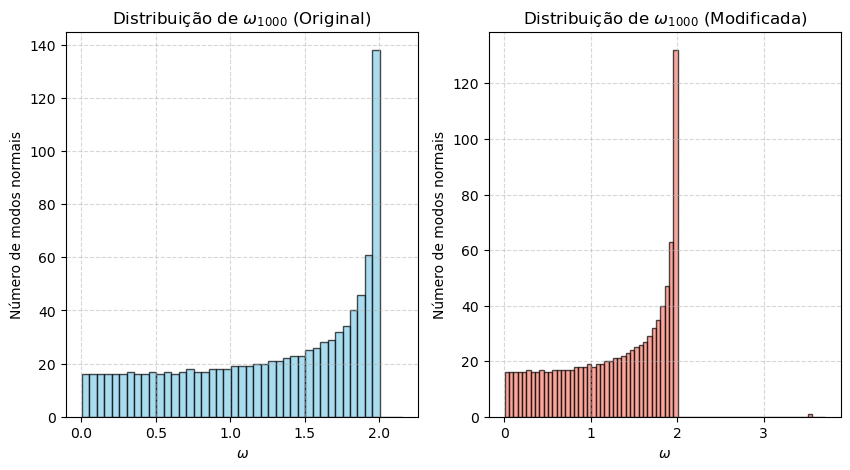

In [81]:
# Configuração do histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# --- Subplot 1: Histograma de w100 ---
ax1.hist(w1000, 
         bins=np.arange(min(w1000), max(w1000) + 0.2, 0.05),
         edgecolor='black',
         color='skyblue',
         alpha=0.7)
ax1.set_title('Distribuição de $\omega_{1000}$ (Original)')
ax1.set_xlabel('$\omega$')
ax1.set_ylabel('Número de modos normais')
ax1.grid(linestyle='--', alpha=0.5)

# --- Subplot 2: Histograma de w100_mod ---
ax2.hist(w1000_mod, 
         bins=np.arange(min(w1000_mod), max(w1000_mod) + 0.2, 0.05),
         edgecolor='black',
         color='salmon',
         alpha=0.7)
ax2.set_title('Distribuição de $\omega_{1000}$ (Modificada)')
ax2.set_xlabel('$\omega$')
ax2.set_ylabel('Número de modos normais')
ax2.grid(linestyle='--', alpha=0.5)

# Mostrar o gráfico
plt.show()

#### Outros

In [15]:
dg1000_principal = np.ones(N2) * (2*k1/m_var)
dg1000_adjacentes = np.ones(N2-1) * (-k1/m_var)
D1000_diag = diags([dg1000_adjacentes, dg1000_principal, dg1000_adjacentes], 
                offsets = [-1, 0, 1], 
                shape=(N2, N2))
D1000_csr = csr_matrix(D1000_diag)

In [ ]:
ww1000_min, v1000_min = eigsh(D1000_csr, k=5, which='SM')  # 50 menores autovalores. 'SM' (Smallest Magnitude) 


### Cadeia de 10000 átomos

In [34]:
# Inicializa a matriz D com zeros
D10000 = np.zeros((N3, N3))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(N3):
    if i == N3-1:  # Última massa
        D10000[i, i] = 2*k1/m
        D10000[i, i-1] = -k1/m
    else:  
        D10000[i, i] = 2*k1/m
        D10000[i, i-1] = -k1/m
        D10000[i, i+1] = -k1/m
       
#cria a matriz com problema de massa
D10000_mod = D10000.copy()
D10000_mod[4999, :] *= k2

In [ ]:
ww_10000, v_10000 = eigh(D10000)
w1000 = np.sqrt(ww_10000)

In [ ]:
ww10000_mod, v10000_mod = eigh(D10000_mod)
w10000_mod = np.sqrt(ww10000_mod)

#### Outros

In [16]:
dg10000_principal = np.ones(N3) * (2*k1/m_var)
dg10000_adjacentes = np.ones(N3-1) * (-k1/m_var)
D10000_diag = diags([dg10000_adjacentes, dg10000_principal, dg10000_adjacentes], 
                offsets = [-1, 0, 1], 
                shape=(N3, N3))
D10000_csr = csr_matrix(D10000_diag)